In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import QFT
from qiskit.visualization import *
from qiskit.circuit.library import MCXGate


#backend = Aer.get_backend('qasm_simulator') 
namen = ["Andreas", "Niko", "Sophia"]
vortrag = ["Grover", "QAOA", "QFT"]
tage = ["Montag", "Dienstag", "Mittwoch"]

In [8]:
day_andreas = QuantumRegister(2, 'day_andreas')
talk_andreas = QuantumRegister(2, 'talk_andreas')
andreas = QuantumRegister(2, 'andreas')

day_niko = QuantumRegister(2, 'day_niko')
talk_niko = QuantumRegister(2, 'talk_niko')
niko = QuantumRegister(2, 'niko')

day_sophia = QuantumRegister(2, 'day_sophia')
talk_sophia = QuantumRegister(2, 'talk_sophia')
sophia = QuantumRegister(2, 'sophia')


ancilla = QuantumRegister(7, "ancilla")

flip = QuantumRegister(1, 'flip')

c = ClassicalRegister(12, 'c')


In [9]:
# Leute: 01 andreas, 10 niko, 11 sophia
# Vorträge: 01 Grover, 10 QFT, 11 QAOA
# Tage: 01 Montag, 10 Dienstag, 11 Mittwoch

qc = QuantumCircuit(day_andreas, talk_andreas, day_niko, talk_niko, day_sophia, talk_sophia, ancilla, flip, c)
 
# put uncertain info in superposition
for register in [day_andreas, talk_andreas, day_niko, talk_niko, day_sophia, talk_sophia]:
    qc.h(register)

# hard code names
#qc.x(andreas[0])
#qc.i(andreas[1])

#qc.i(niko[0])
#qc.x(niko[1])

#qc.x(sophia[0])
#qc.x(sophia[1])
qc.x(flip[0])
qc.h(flip[0])

qc.barrier()
qc.barrier()


for i in range(1):
    # first constraint: QFT is on Monday

    # option1 : Andreas QFT Monday

    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_andreas[0], talk_andreas[1], day_andreas[0], day_andreas[1]])


    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])
    qc.barrier()

    # option2: Niko QFT Monday

    qc.x(talk_niko[1])
    qc.x(day_niko[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_niko[0], talk_niko[1], day_niko[0], day_niko[1]])


    qc.x(talk_niko[1])
    qc.x(day_niko[0])
    qc.barrier()

    # option3: Sophia QFT Monday

    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_sophia[0], talk_sophia[1], day_sophia[0], day_sophia[1]])


    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])
    qc.barrier()

    # check that only one option triggers


    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])



    qc.x(talk_niko[1])
    qc.x(day_niko[0])



    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])

    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_andreas[0], talk_andreas[1], day_andreas[0], day_andreas[1], talk_niko[0], talk_niko[1], day_niko[0], day_niko[1], talk_sophia[0], talk_sophia[1], day_sophia[0], day_sophia[1]])

    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])



    qc.x(talk_niko[1])
    qc.x(day_niko[0])



    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])


    qc.barrier()
    qc.barrier()
    # second constraint: Andreas is giving talk about QAOA
    qc.mcx(target_qubit=ancilla[1], control_qubits=[talk_andreas[0],talk_andreas[1]])
    qc.barrier()
    qc.barrier()




    # third constraint: Niko is giving talk later than Sophia
    qc.mcx(target_qubit=ancilla[2], control_qubits=[day_niko[0]])
    qc.mcx(target_qubit=ancilla[3], control_qubits=[day_sophia[0]])
    qc.mcx(target_qubit=ancilla[3], control_qubits=[day_sophia[1]])
    qc.barrier()
    qc.barrier()






    #fourth constraint
    qc.x(day_andreas[1])
    qc.mcx(target_qubit=ancilla[4], control_qubits=[day_andreas[0],day_andreas[1],talk_andreas[0],talk_andreas[1]])
    qc.x(day_andreas[1])
    qc.barrier()


    qc.x(talk_niko[0])
    qc.x(day_niko[1])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_niko[0],day_niko[1],talk_niko[0],talk_niko[1]])   
    qc.x(day_niko[1])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_niko[0],day_niko[1],talk_niko[0],talk_niko[1]])
    qc.x(talk_niko[0])
    qc.barrier()
    
    qc.x(talk_sophia[0])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_sophia[0],talk_sophia[0],talk_sophia[1]])
    qc.x(talk_sophia[0])
    qc.barrier()
    qc.barrier()
    


    #fifth constraint
    qc.x(day_andreas[1])
    qc.x(day_sophia[0])

    qc.mcx(target_qubit=ancilla[6], control_qubits=[day_andreas[0],day_andreas[1],day_niko[0],day_niko[1],day_sophia[0],day_sophia[1]])
    qc.x(day_andreas[1])
    qc.x(day_sophia[0])
    
    qc.barrier()
    
    qc.x(day_niko[1])
    qc.x(day_sophia[0])
    qc.mcx(target_qubit=ancilla[6], control_qubits=[day_andreas[0],day_andreas[1],day_niko[0],day_niko[1],day_sophia[0],day_sophia[1]])
    qc.x(day_niko[1])
    qc.x(day_sophia[0])



    #bitflip
    qc.barrier()
    qc.mcx(target_qubit=flip[0], control_qubits=[ancilla[0],ancilla[1],ancilla[2],ancilla[3],ancilla[4],ancilla[5],ancilla[6]])
    
    qc.barrier()




    #################SPIEGELUNG#############

    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_andreas[0], talk_andreas[1], day_andreas[0], day_andreas[1]])


    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])
    qc.barrier()

    # option2: Niko QFT Monday

    qc.x(talk_niko[1])
    qc.x(day_niko[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_niko[0], talk_niko[1], day_niko[0], day_niko[1]])


    qc.x(talk_niko[1])
    qc.x(day_niko[0])
    qc.barrier()

    # option3: Sophia QFT Monday

    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])


    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_sophia[0], talk_sophia[1], day_sophia[0], day_sophia[1]])


    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])
    qc.barrier()

    # check that only one option triggers


    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])



    qc.x(talk_niko[1])
    qc.x(day_niko[0])



    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])

    qc.mcx(target_qubit=ancilla[0], control_qubits=[talk_andreas[0], talk_andreas[1], day_andreas[0], day_andreas[1], talk_niko[0], talk_niko[1], day_niko[0], day_niko[1], talk_sophia[0], talk_sophia[1], day_sophia[0], day_sophia[1]])

    qc.x(talk_andreas[1])
    qc.x(day_andreas[0])



    qc.x(talk_niko[1])
    qc.x(day_niko[0])



    qc.x(talk_sophia[1])
    qc.x(day_sophia[0])


    qc.barrier()
    qc.barrier()
    # second constraint: Andreas is giving talk about QAOA
    qc.mcx(target_qubit=ancilla[1], control_qubits=[talk_andreas[0],talk_andreas[1]])
    qc.barrier()
    qc.barrier()




    # third constraint: Niko is giving talk later than Sophia
    qc.mcx(target_qubit=ancilla[2], control_qubits=[day_niko[0]])
    qc.mcx(target_qubit=ancilla[3], control_qubits=[day_sophia[0]])
    qc.mcx(target_qubit=ancilla[3], control_qubits=[day_sophia[1]])
    qc.barrier()
    qc.barrier()






    #fourth constraint
    qc.x(day_andreas[1])
    qc.mcx(target_qubit=ancilla[4], control_qubits=[day_andreas[0],day_andreas[1],talk_andreas[0],talk_andreas[1]])
    qc.x(day_andreas[1])
    qc.barrier()


    qc.x(talk_niko[0])
    qc.x(day_niko[1])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_niko[0],day_niko[1],talk_niko[0],talk_niko[1]])   
    qc.x(day_niko[1])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_niko[0],day_niko[1],talk_niko[0],talk_niko[1]])
    qc.x(talk_niko[0])
    qc.barrier()
    
    
    
    qc.x(talk_sophia[0])
    qc.mcx(target_qubit=ancilla[5], control_qubits=[day_sophia[0],talk_sophia[0],talk_sophia[1]])
    qc.x(talk_sophia[0])
    qc.barrier()
    qc.barrier()
    
        #fifth constraint
    qc.x(day_andreas[1])
    qc.x(day_sophia[0])

    qc.mcx(target_qubit=ancilla[6], control_qubits=[day_andreas[0],day_andreas[1],day_niko[0],day_niko[1],day_sophia[0],day_sophia[1]])
    qc.x(day_andreas[1])
    qc.x(day_sophia[0])
    
    qc.barrier()
    
    qc.x(day_niko[1])
    qc.x(day_sophia[0])
    qc.mcx(target_qubit=ancilla[6], control_qubits=[day_andreas[0],day_andreas[1],day_niko[0],day_niko[1],day_sophia[0],day_sophia[1]])
    qc.x(day_niko[1])
    qc.x(day_sophia[0])





    # Diffusor
    qc.h(day_andreas)
    qc.h(talk_andreas)
    qc.h(day_niko)
    qc.h(talk_niko)
    qc.h(day_sophia)
    qc.h(talk_sophia)

    qc.x(day_andreas)
    qc.x(talk_andreas)
    qc.x(day_niko)
    qc.x(talk_niko)
    qc.x(day_sophia)
    qc.x(talk_sophia)

    qc.h(talk_sophia[1])
    qc.mcx(target_qubit = talk_sophia[1], control_qubits = [day_andreas[0], day_andreas[1], talk_andreas[0], talk_andreas[1], day_niko[0], day_niko[1], talk_niko[0], talk_niko[1], day_sophia[0], day_sophia[1], talk_sophia[0]])
    qc.h(talk_sophia[1])

    qc.x(day_andreas)
    qc.x(talk_andreas)
    qc.x(day_niko)
    qc.x(talk_niko)
    qc.x(day_sophia)
    qc.x(talk_sophia)

    qc.h(day_andreas)
    qc.h(talk_andreas)
    qc.h(day_niko)
    qc.h(talk_niko)
    qc.h(day_sophia)
    qc.h(talk_sophia)



qc.measure([day_andreas[0],day_andreas[1], talk_andreas[0], talk_andreas[1],day_niko[0],day_niko[1],talk_niko[0],talk_niko[1],day_sophia[0],day_sophia[1],talk_sophia[0],talk_sophia[1]],c)


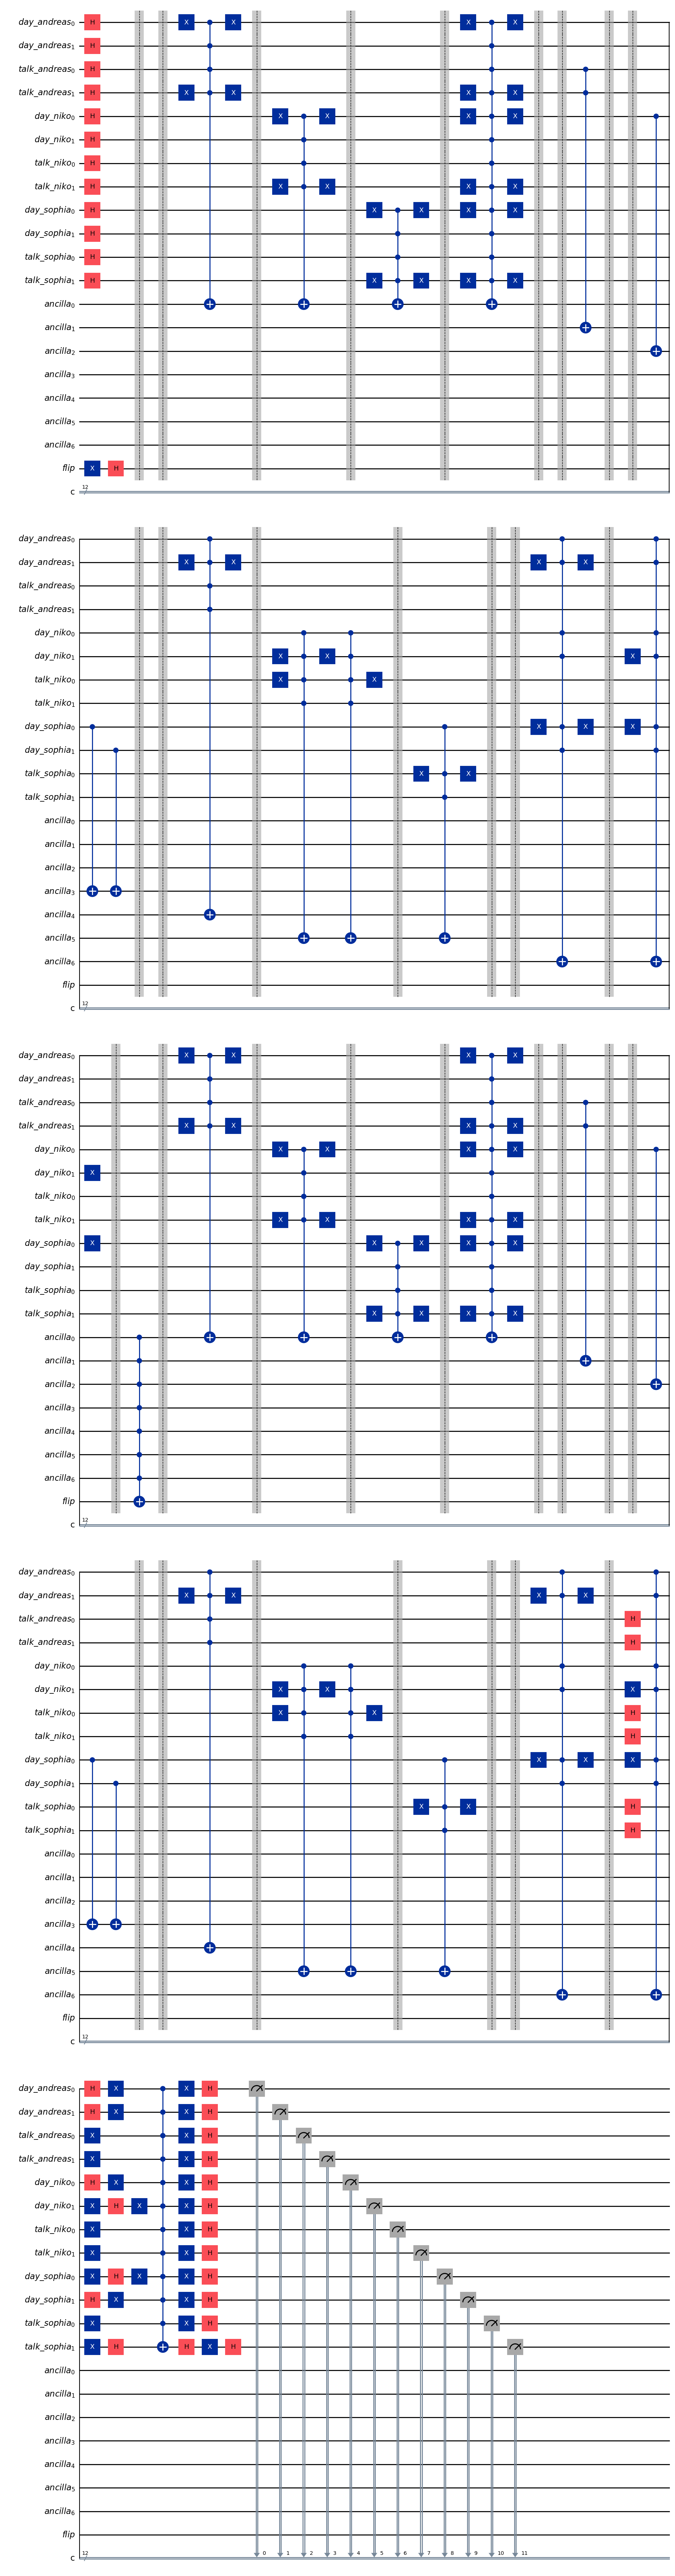

In [10]:
qc.draw('mpl')